## Раздел "1.6 Библиотеки Python для визуализации данных."

##  Практические задания

Используя датасет https://www.kaggle.com/datasets/andrewmvd/data-engineer-jobs:

- Построить график компаний с самым большим кол-вом вакансий  
- Построить график самых популярный названий в вакансиях  
- Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму
- Построить график популярности по колонке Type of ownership, относительно численности вакансий
- Построить график популярности по секторам работы
- Построить график используя сектора работы и средний уровень зарплат в них
- Построить гистограмму распределения рейтинга компаний
- Построить график средних зарплат по популярным компаниям
- Построить описаний вакансий облако тегов, исследовать самые популярные слова

В графиках использовать основные цвета сайта hh.ru

#### Решение

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('DataEngineer.csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


#### В графиках использовать основные цвета сайта hh.ru

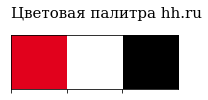

In [78]:
# https://dev.hh.ru/articles/logos - Правила использования логотипа hh.ru
# Цвета фирменного стиля: красный и белый.
sns.palplot(['#e1011c', '#ffffff', '#000000'])

plt.title("Цветовая палитра hh.ru",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

#### Построить график компаний с самым большим кол-вом вакансий

In [26]:
# Удаление лишних символов из названия компаний
data['Company Name'] = data['Company Name'].str.rstrip('0123456789.\n')

In [85]:
data_companies = data['Company Name'].value_counts().head(10)

In [100]:
data_companies

Amazon                       28
Lockheed Martin              18
Apple                        18
IntraEdge                    16
Humana                       16
Bell Helicopter              15
Diverse Lynx                 15
Management Decisions, Inc    14
Google                       14
MUFG                         13
Name: Company Name, dtype: int64

In [87]:
color_map = ['#ffffff' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#e1011c'

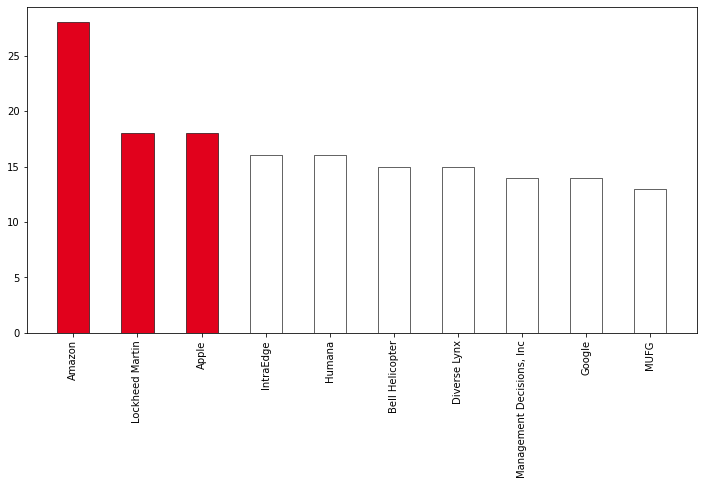

In [99]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_companies.index, data_companies, width=0.5, 
       edgecolor='black',
       linewidth=0.6,color=color_map)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

#### Построить график самых популярный названий в вакансиях

In [101]:
data_jobs = data['Job Title'].value_counts().head(10)
data_jobs

Data Engineer                469
Senior Data Engineer         103
Software Engineer             93
Big Data Engineer             73
Sr. Data Engineer             35
Machine Learning Engineer     17
Data Engineer II              16
Data Warehouse Engineer       14
Systems Engineer              13
Data Platform Engineer        13
Name: Job Title, dtype: int64

In [104]:
color_map = ['#ffffff' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = '#e1011c'

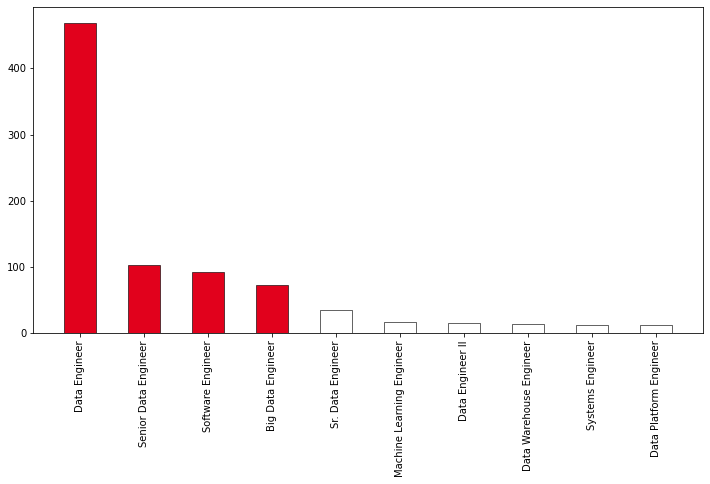

In [105]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_jobs.index, data_jobs, width=0.5, 
       edgecolor='black',
       linewidth=0.6,color=color_map)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

#### Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

In [106]:
data_loc = data['Location'].value_counts().head(10)
data_loc

Houston, TX         199
Austin, TX          199
San Diego, CA       195
Chicago, IL         192
San Antonio, TX     190
New York, NY        187
Philadelphia, PA    135
Jacksonville, FL    122
Phoenix, AZ         117
Los Angeles, CA     106
Name: Location, dtype: int64

In [107]:
color_map = ['#e1011c' for _ in range(10)]
color_map[-1] = color_map[-2] = color_map[-3] = color_map[-4] = '#ffffff'

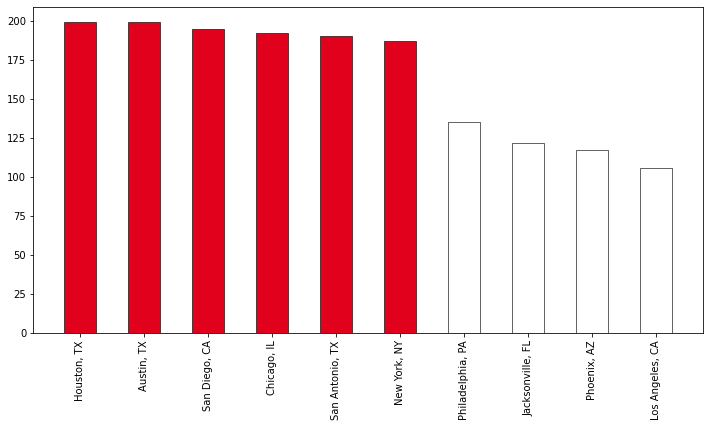

In [113]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_loc.index, data_loc, width=0.5, 
       edgecolor='black',
       linewidth=0.6,color=color_map)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

In [108]:
df_polar = data_loc.reset_index()

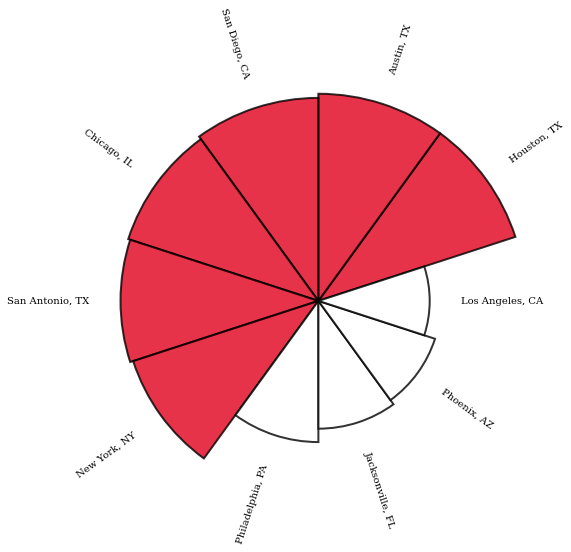

In [112]:
# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = df_polar['Location'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_polar['Location'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_polar.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="black",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_polar["index"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

#### Построить график популярности по колонке Type of ownership, относительно численности вакансий

In [119]:
data_type = data.loc[data['Type of ownership'] != -1, 'Type of ownership'].value_counts().head(8)
data_type

Company - Private                 1392
Company - Public                   754
Subsidiary or Business Segment     126
-1                                 119
Nonprofit Organization              48
Unknown                             30
Government                          21
College / University                13
Name: Type of ownership, dtype: int64

In [123]:
color_map = ['#ffffff' for _ in range(8)]
color_map[0] = color_map[1] = '#e1011c'

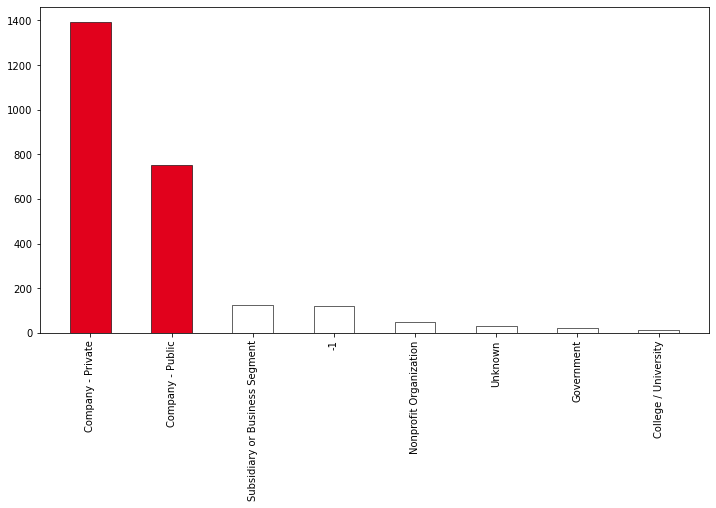

In [124]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_type.index, data_type, width=0.5, 
       edgecolor='black',
       linewidth=0.6,color=color_map)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

#### Построить график популярности по секторам работы

In [127]:
data_sec = data.loc[data['Sector'] != '-1', 'Sector'].value_counts().head(10)
data_sec

Information Technology          890
Business Services               416
Finance                         177
Aerospace & Defense              94
Manufacturing                    93
Insurance                        82
Media                            52
Health Care                      51
Oil, Gas, Energy & Utilities     37
Retail                           36
Name: Sector, dtype: int64

In [128]:
color_map = ['#ffffff' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#e1011c'

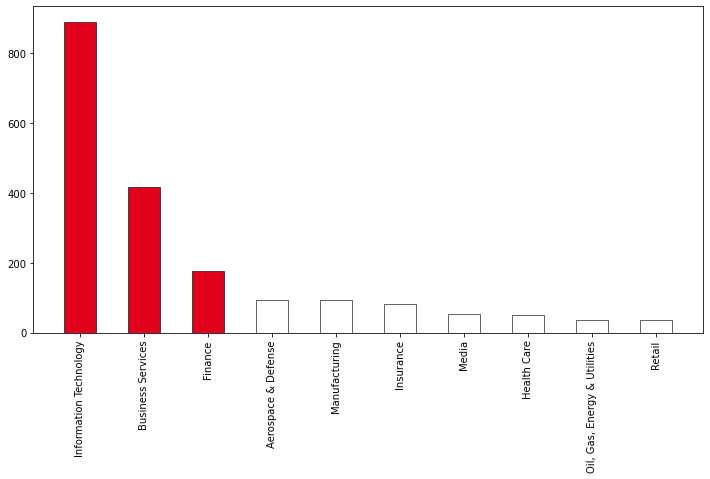

In [130]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_sec.index, data_sec, width=0.5, 
       edgecolor='black',
       linewidth=0.6,color=color_map)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

#### Построить график используя сектора работы и средний уровень зарплат в них

In [57]:
data['Salary Estimate'].value_counts().head(10)

$60K-$109K (Glassdoor est.)     62
$75K-$135K (Glassdoor est.)     44
$82K-$130K(Employer est.)       42
$93K-$106K (Glassdoor est.)     32
$52K-$85K (Glassdoor est.)      32
$95K-$99K (Glassdoor est.)      32
$99K-$177K (Glassdoor est.)     32
$85K-$158K (Glassdoor est.)     32
$105K-$110K (Glassdoor est.)    32
$108K-$127K (Glassdoor est.)    32
Name: Salary Estimate, dtype: int64

In [56]:
# Определение средней зарплаты для каждой вакансии
data['Mean Salary'] = data['Salary Estimate'].str.findall(r'\d+').apply(lambda x: (float(x[0]) + float(x[1])) / 2)

In [60]:
data['Mean Salary'].sort_values(ascending=False).head(10)

1198    217.5
1188    217.5
1199    217.5
1194    217.5
1195    217.5
1196    217.5
1193    217.5
1192    217.5
1191    217.5
1190    217.5
Name: Mean Salary, dtype: float64

In [140]:
data_sec = data[data['Sector'] != '-1'].groupby('Sector').agg({'Mean Salary': 'mean'}).sort_values(by='Mean Salary', ascending=False).head(10)

In [141]:
data_sec['Mean Salary']

Sector
Biotech & Pharmaceuticals            112.314286
Media                                111.076923
Accounting & Legal                   106.259259
Health Care                          106.235294
Non-Profit                           105.750000
Information Technology               104.754494
Manufacturing                        103.672043
Education                            102.375000
Transportation & Logistics           100.750000
Restaurants, Bars & Food Services    100.571429
Name: Mean Salary, dtype: float64

#### Построить гистограмму распределения рейтинга компаний

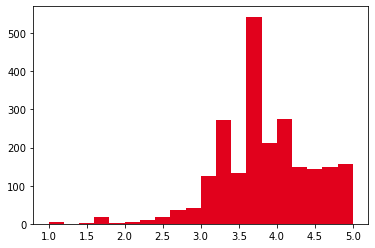

In [144]:
_ = plt.hist(data.loc[data['Rating'] != -1, 'Rating'], bins=20, color='#e1011c')

#### Построить график средних зарплат по популярным компаниям

In [145]:
data_sal = data.groupby('Company Name').agg({'Mean Salary': 'mean', 'Job Title': 'count'}).sort_values(by='Job Title', ascending=False).head(10)

In [147]:
data_sal['Mean Salary']

Company Name
Amazon                       104.321429
Lockheed Martin               90.583333
Apple                        124.444444
IntraEdge                     93.125000
Humana                        75.218750
Bell Helicopter               82.666667
Diverse Lynx                  84.733333
Google                       106.000000
Management Decisions, Inc    124.857143
MUFG                          99.153846
Name: Mean Salary, dtype: float64

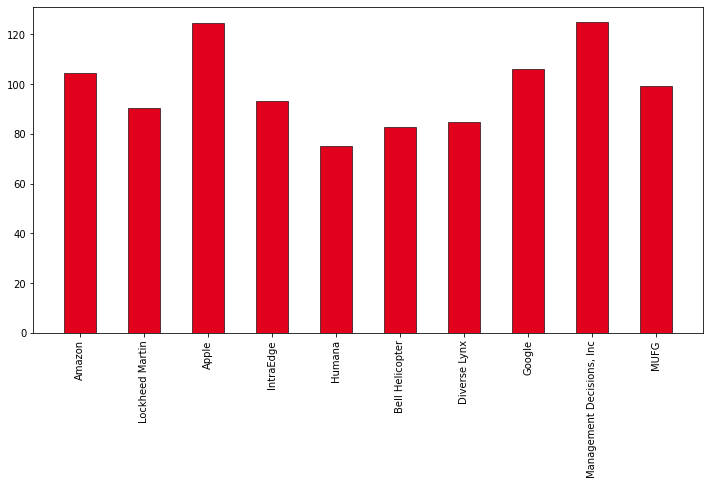

In [149]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_sal['Mean Salary'].index, data_sal['Mean Salary'], width=0.5, 
       edgecolor='black',
       linewidth=0.6,color='#e1011c')
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

#### Построить описаний вакансий облако тегов, исследовать самые популярные слова

In [152]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

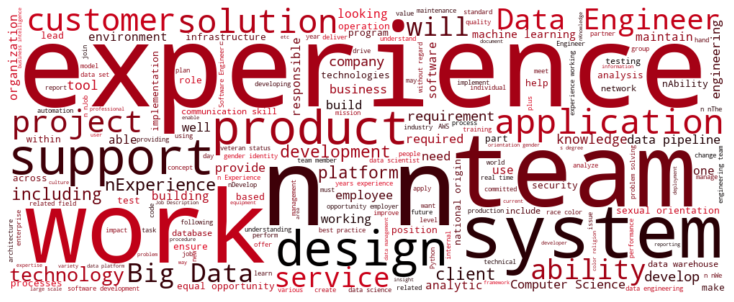

In [170]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#e1011c', '#000000'])

text = str(list(data['Job Description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '').replace('\n', ' ').replace(' n ', '')

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 400,colormap=cmap, max_words = 200).generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()